In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../DATA/mushrooms.csv")

<Axes: xlabel='class', ylabel='count'>

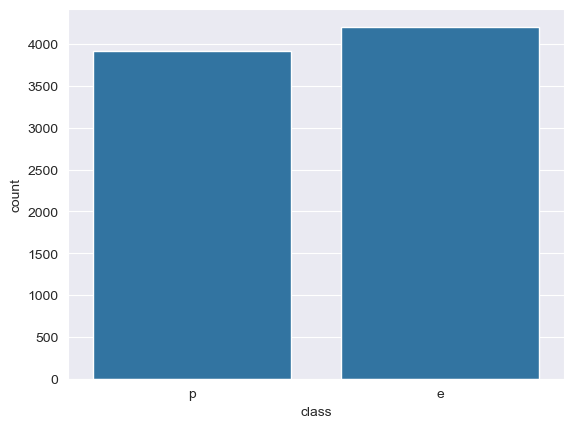

In [3]:
sns.countplot(data=df, x='class')

In [4]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


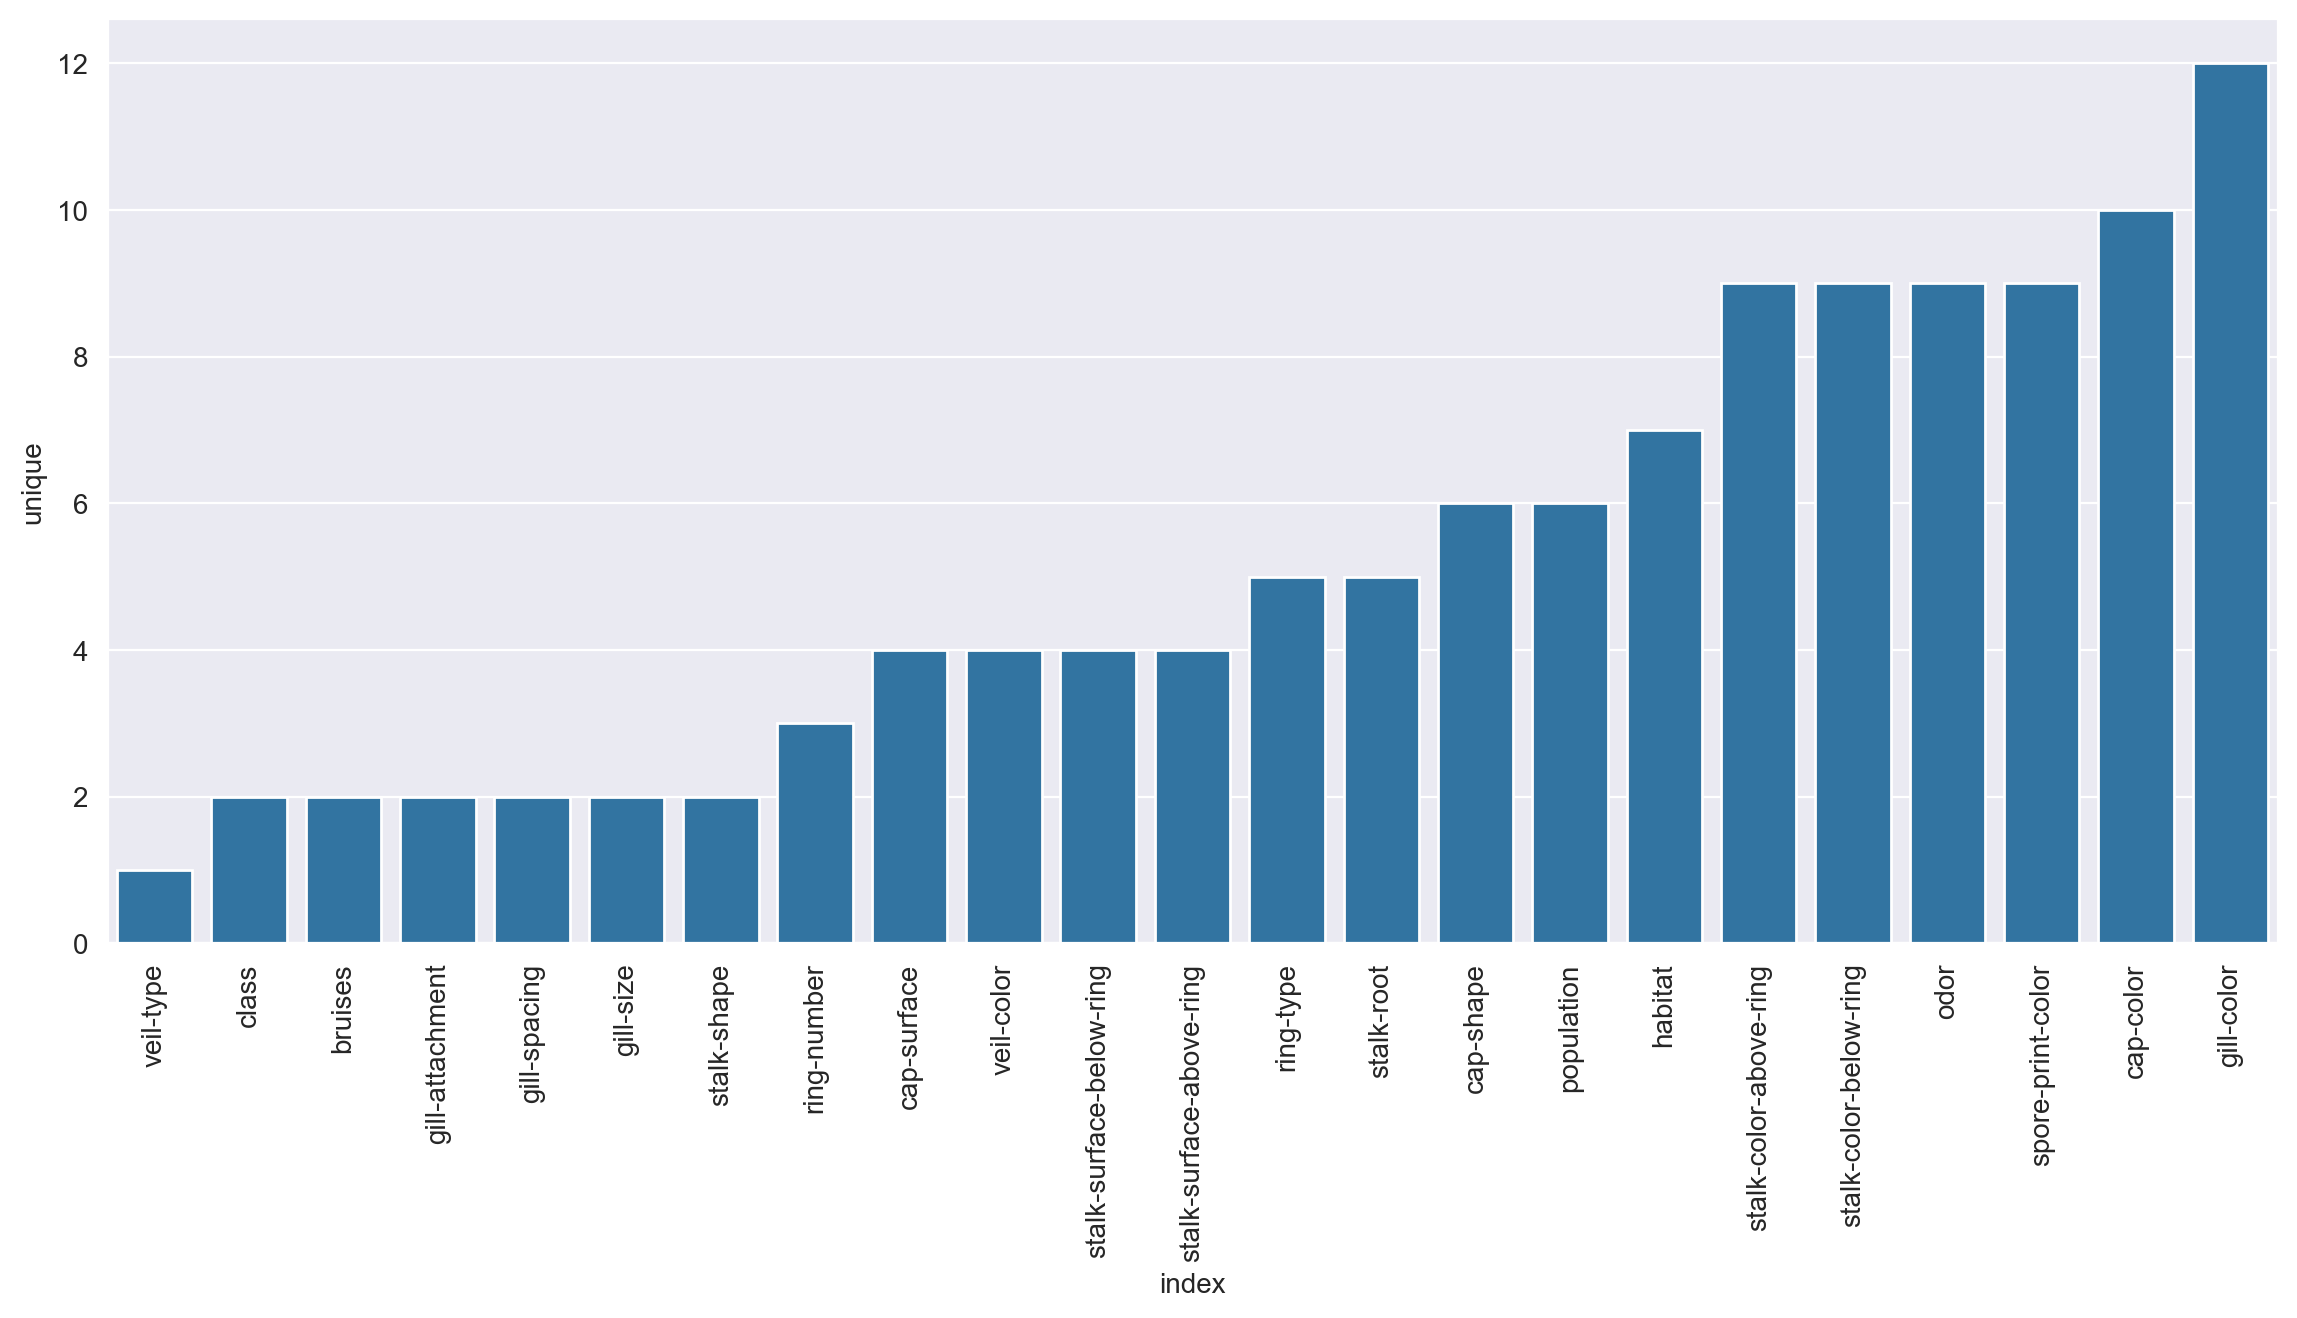

In [5]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

In [6]:
X = df.drop('class',axis=1)

In [7]:
X = pd.get_dummies(X,drop_first=True)

In [8]:
y = df['class']

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=101)

In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [14]:
model = AdaBoostClassifier(n_estimators=1)

In [15]:
model.fit(X_train, y_train)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [17]:
predictions = model.predict(X_test)

In [18]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [20]:
accuracy_score(y_test, predictions)

0.8777686628383922

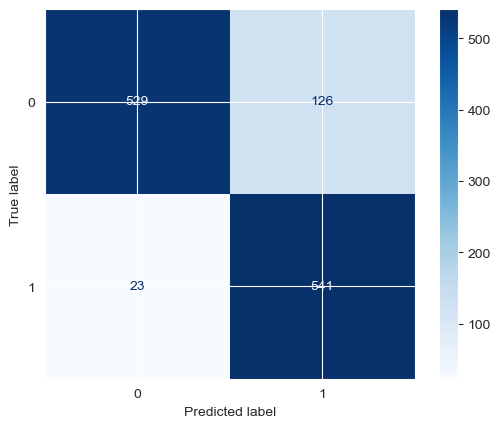

In [22]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot(cmap='Blues')

In [23]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
model.feature_importances_.argmax()

22

In [25]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

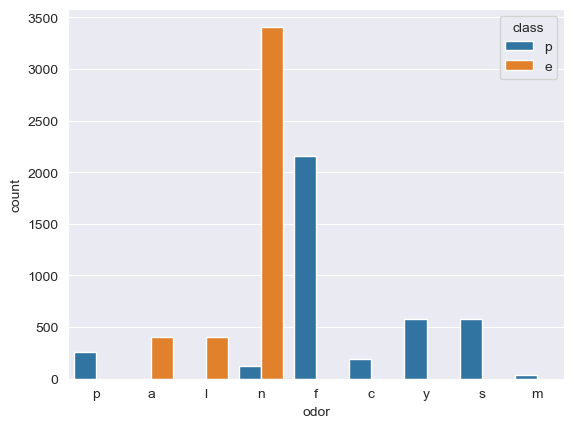

In [26]:
sns.countplot(data=df, x='odor', hue='class')

In [27]:
len(X.columns)

95

In [32]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n, algorithm='SAMME')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    error_rates.append(1 - accuracy_score(preds, y_test))

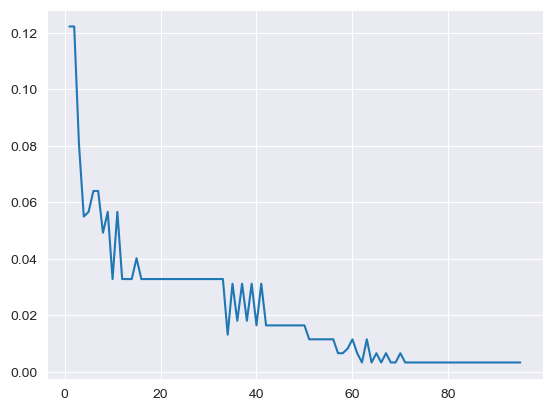

In [33]:
plt.plot(range(1, 96), error_rates)

In [34]:
model

AdaBoostClassifier(algorithm='SAMME', n_estimators=95)

In [40]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [41]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [42]:
imp_feats = feats[feats['Importance']>0]

In [43]:
imp_feats

,Importance
odor_c,0.087581
odor_f,0.154831
odor_l,0.032974
odor_n,0.075969
odor_p,0.085536
gill-spacing_w,0.014493
gill-size_n,0.047615
stalk-shape_t,0.022613
stalk-root_c,0.019609
stalk-surface-above-ring_k,0.041459


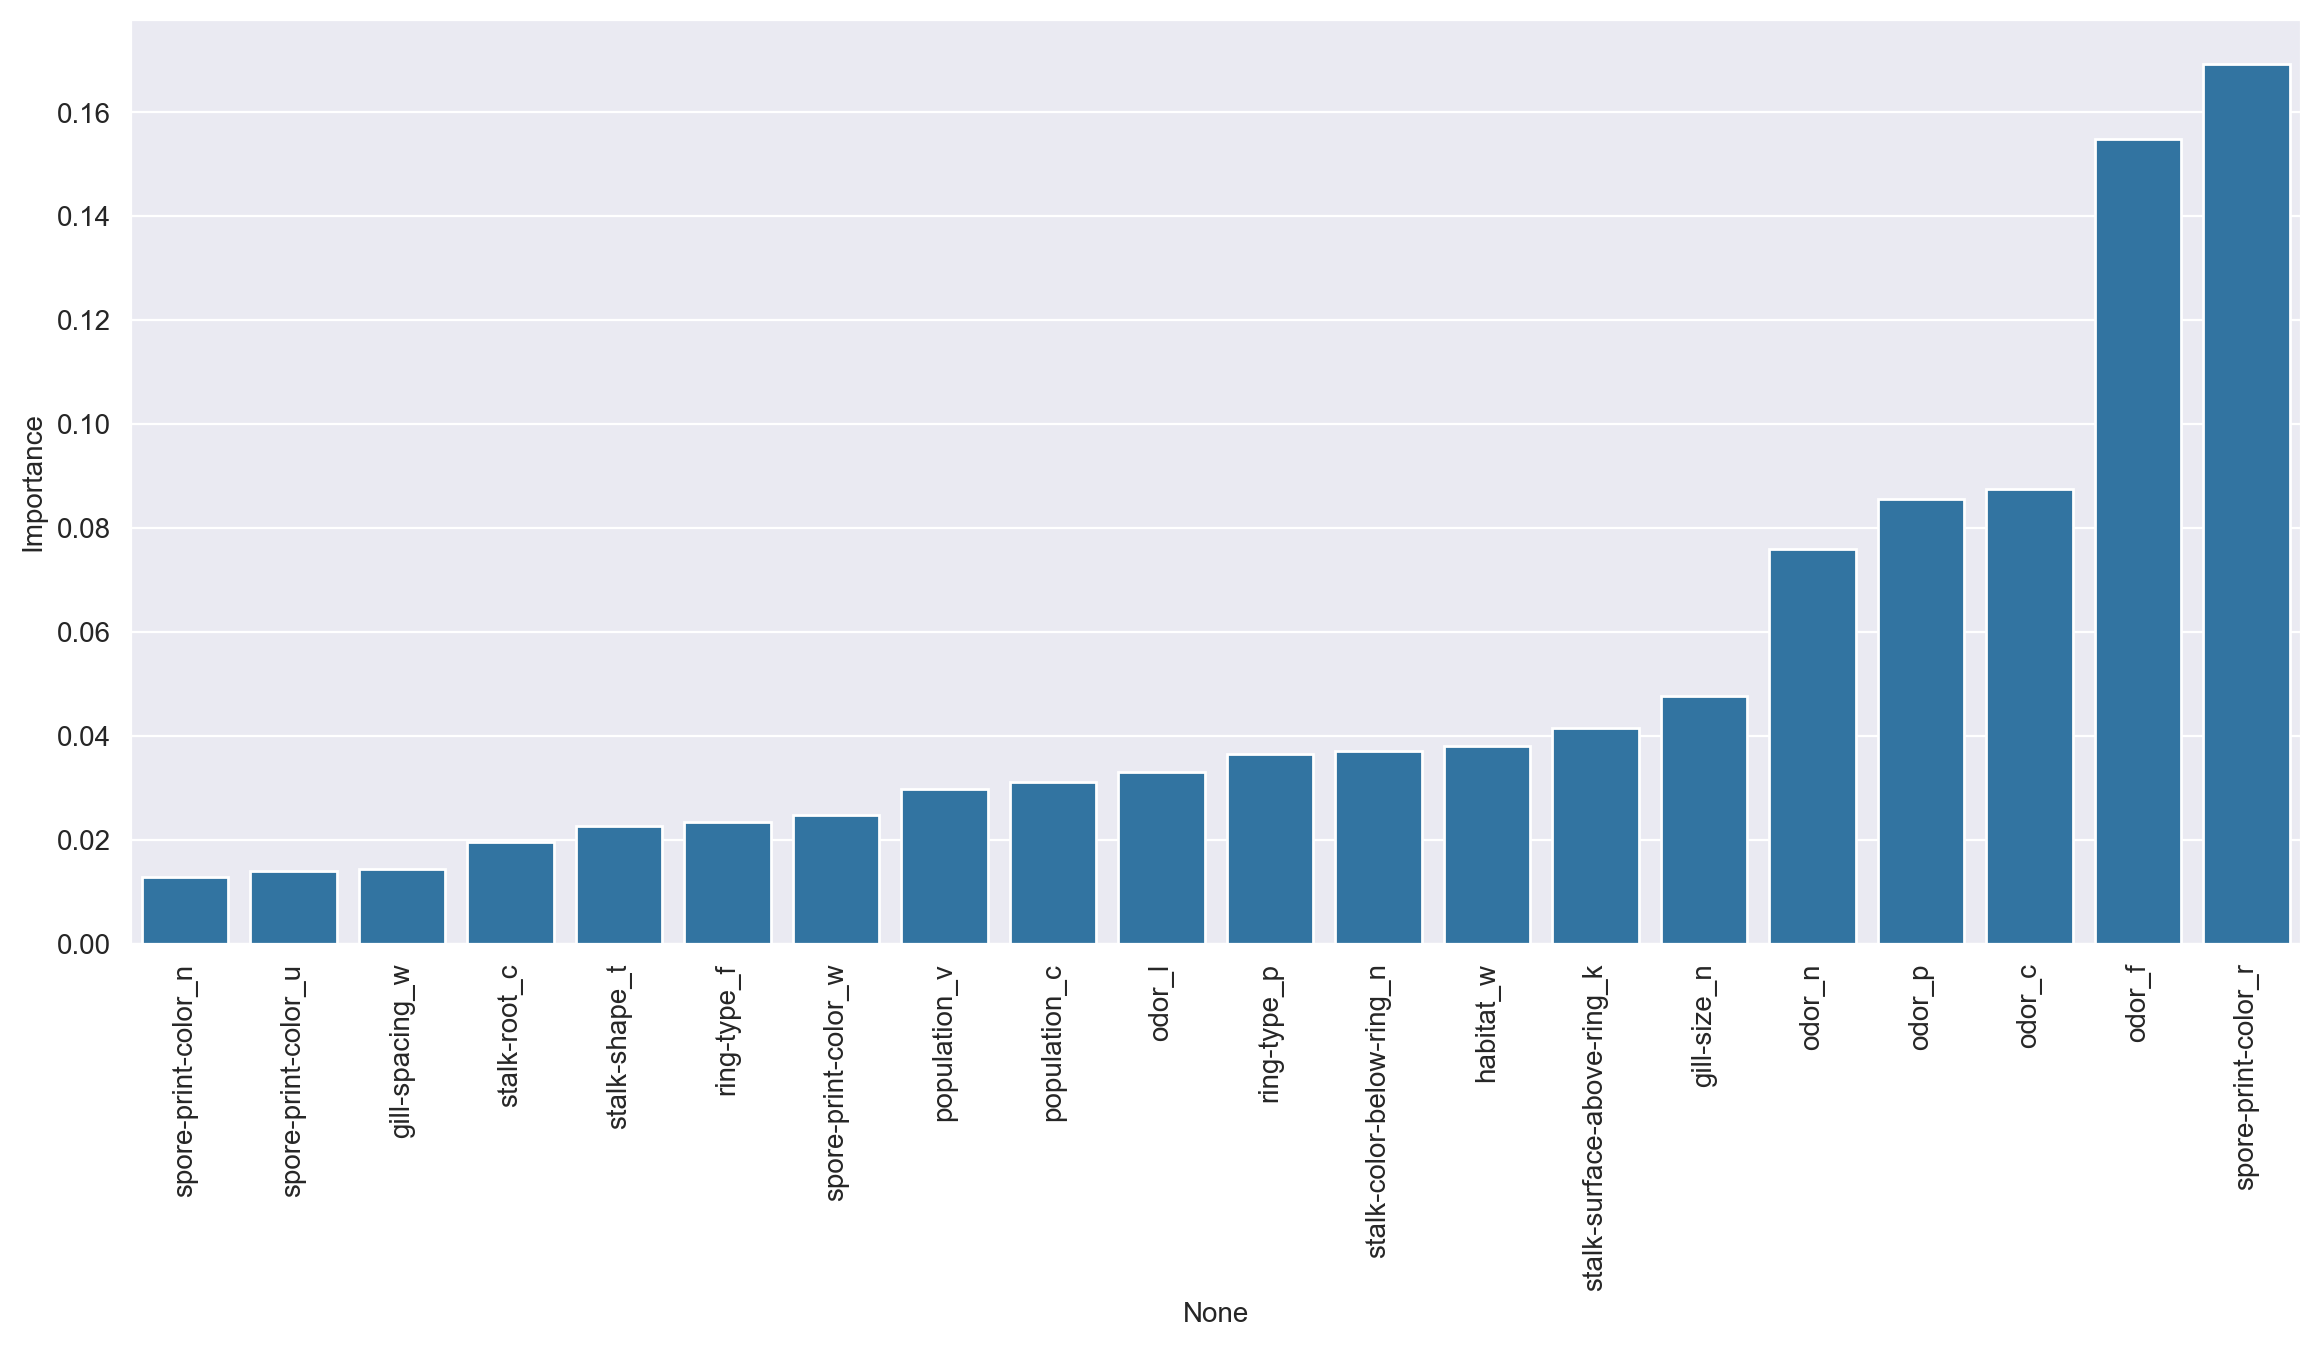

In [44]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

<Axes: xlabel='habitat', ylabel='count'>

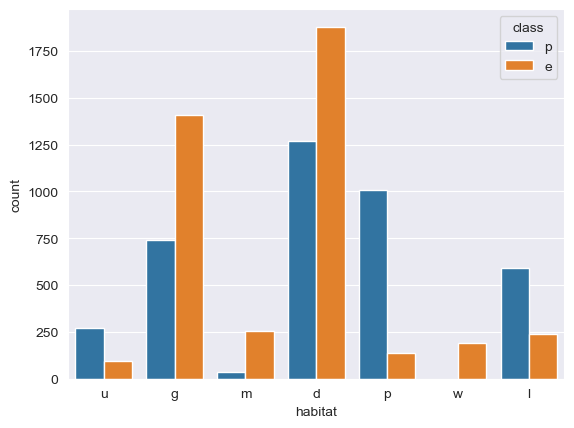

In [45]:
sns.countplot(data=df,x='habitat',hue='class')